# Near-horizon geometry of the extremal Kerr black hole


This notebook derives the near-horizon geometry of the extremal (i.e. maximally spinning) Kerr black hole. It is based on SageMath tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr/). 

This notebook requires a version of SageMath at least equal to 9.4:

In [1]:
version()

'SageMath version 10.3.rc3, Release Date: 2024-03-10'

First we set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

To speed up computations, we ask for running them in parallel on 8 threads:

In [3]:
Parallelism().set(nproc=8)

## Spacetime manifold

We declare the Kerr spacetime (or more precisely the part of it covered by Boyer-Lindquist coordinates) as a 4-dimensional Lorentzian manifold $\mathcal{M}$:

In [4]:
M = Manifold(4, 'M', latex_name=r'\mathcal{M}', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


We then introduce the standard **Boyer-Lindquist coordinates** $(t,r,\theta,\phi)$ as a chart `BL` (for *Boyer-Lindquist*) on $\mathcal{M}$, via the method `chart()`. The argument of the latter is a string
(delimited by `r"..."` because of the backslash symbols) expressing the coordinates names, their ranges (the default is $(-\infty,+\infty)$) and their LaTeX symbols:

In [5]:
BL.<t,r,th,ph> = M.chart(r"t r th:(0,pi):\theta ph:(0,2*pi):periodic:\phi") 
print(BL); BL

Chart (M, (t, r, th, ph))


Chart (M, (t, r, th, ph))

In [6]:
BL.coord_range()

t: (-oo, +oo); r: (-oo, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

In [7]:
BL[0]

t

In [8]:
BL[2]

th

## Metric tensor of the extremal Kerr spacetime

The mass parameter $m$ of the Kerr spacetime is declared as a symbolic variable:

In [9]:
m = var('m', domain='real')

For the extremal Kerr black hole, the spin parameter $a$ reaches its upper bound, namely $m$:

In [10]:
a = m

We get the (yet undefined) spacetime metric:

In [11]:
g = M.metric()

The metric is set by providing its nonzero  components in the coordinate frame associated with Boyer-Lindquist coordinates, which is the current manifold's default frame:

In [12]:
rho2 = r^2 + (a*cos(th))^2
Delta = r^2 -2*m*r + a^2
g[0,0] = -(1-2*m*r/rho2)
g[0,3] = -2*a*m*r*sin(th)^2/rho2
g[1,1], g[2,2] = rho2/Delta, rho2
g[3,3] = (r^2+a^2+2*m*r*(a*sin(th))^2/rho2)*sin(th)^2
g.display()

g = (2*m*r/(m^2*cos(th)^2 + r^2) - 1) dt⊗dt - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dt⊗dph + (m^2*cos(th)^2 + r^2)/(m^2 - 2*m*r + r^2) dr⊗dr + (m^2*cos(th)^2 + r^2) dth⊗dth - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dph⊗dt + (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2 dph⊗dph

<p>A matrix view of the components with respect to the manifold's default vector frame:</p>

In [13]:
g[:]

[                                2*m*r/(m^2*cos(th)^2 + r^2) - 1                                                               0                                                               0                        -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2)]
[                                                              0                       (m^2*cos(th)^2 + r^2)/(m^2 - 2*m*r + r^2)                                                               0                                                               0]
[                                                              0                                                               0                                             m^2*cos(th)^2 + r^2                                                               0]
[                       -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2)                                                               0                                                               0 (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2]

<p>The list of the non-vanishing components:</p>

In [14]:
g.display_comp()

g_t,t = 2*m*r/(m^2*cos(th)^2 + r^2) - 1 
g_t,ph = -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) 
g_r,r = (m^2*cos(th)^2 + r^2)/(m^2 - 2*m*r + r^2) 
g_th,th = m^2*cos(th)^2 + r^2 
g_ph,t = -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) 
g_ph,ph = (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2

Let us check that we are dealing with a solution of the **vacuum Einstein equation**:

In [15]:
g.ricci().display()

Ric(g) = 0

## Near-horizon coordinates

Let us introduce the chart `NH` of the near-horizon coordinates $(T, R, \theta, \Phi)$:

In [16]:
NH.<T,R,th,Ph> = M.chart(r"T R th:(0,pi):\theta Ph:(0,2*pi):periodic:\Phi") 
print(NH)
NH

Chart (M, (T, R, th, Ph))


Chart (M, (T, R, th, Ph))

In [17]:
M.atlas()

[Chart (M, (t, r, th, ph)), Chart (M, (T, R, th, Ph))]

Following J. Bardeen and G. T. Horowitz, 
[Phys. Rev. D **60**, 104030 (1999)](https://doi.org/10.1103/PhysRevD.60.104030) ([arXiv:hep-th/9905099](https://arxiv.org/abs/hep-th/9905099)), the near-horizon coordinates $(T, R, \theta, \Phi)$ are related to the Boyer-Lindquist coordinates by
$$T = \epsilon \frac{t}{2m}, \quad R = \frac{r-m}{\epsilon m},\quad \theta = \theta, 
\quad\Phi = \phi - \frac{t}{2m},$$
where $\epsilon$ is a constant parameter.
The horizon of the extremal Kerr black hole is located at $r=m$, which corresponds to $R=0$.

*NB:* the coordinates $T$ and $R$ introduced by Bardeen and Horowitz (BH), which are denoted $t$ and $r$ by them, are actually $T_{\rm BH} = 2m T$ and $R_{\rm BH} = m R$.

We implement the above relations as a **transition map** from the chart `BL` to the chart `NH`:

In [18]:
eps = var('eps', latex_name=r'\epsilon')
BL_to_NH = BL.transition_map(NH, [eps*t/(2*m), (r-m)/(eps*m), th, ph - t/(2*m)])
BL_to_NH.display()

T = 1/2*eps*t/m
R = -(m - r)/(eps*m)
th = th
Ph = ph - 1/2*t/m

The inverse relation is

In [19]:
BL_to_NH.inverse().display()

t = 2*T*m/eps
r = (R*eps + 1)*m
th = th
ph = (Ph*eps + T)/eps

Note that we have

In [20]:
BL_to_NH.jacobian()

[1/2*eps/m         0         0         0]
[        0 1/(eps*m)         0         0]
[        0         0         1         0]
[   -1/2/m         0         0         1]

and

In [21]:
BL_to_NH.jacobian_det()

1/2/m^2

The metric components with respect the coordinates 
$(T, R, \theta, \Phi)$ are computed by passing the 
chart `NH` to the method `display()`:

In [22]:
M.default_chart()

Chart (M, (t, r, th, ph))

In [23]:
g.display()  # display in the default chart, i.e. BL

g = (2*m*r/(m^2*cos(th)^2 + r^2) - 1) dt⊗dt - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dt⊗dph + (m^2*cos(th)^2 + r^2)/(m^2 - 2*m*r + r^2) dr⊗dr + (m^2*cos(th)^2 + r^2) dth⊗dth - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dph⊗dt + (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2 dph⊗dph

In [24]:
g.display(NH)  # triggers the computation of the components w.r.t. NH chart

g = -(R^2*m^2*cos(th)^4 + (R^4*eps^2 + 4*R^3*eps + 6*R^2)*m^2*cos(th)^2 - (R^4*eps^2 + 4*R^3*eps + 3*R^2)*m^2)/(R^2*eps^2 + 2*R*eps + cos(th)^2 + 1) dT⊗dT - (R^2*eps*m^2*sin(th)^4 - (R^4*eps^3 + 4*R^3*eps^2 + 8*R^2*eps + 4*R)*m^2*sin(th)^2)/(R^2*eps^2 + 2*R*eps + cos(th)^2 + 1) dT⊗dPh + (m^2*cos(th)^2 + (R^2*eps^2 + 2*R*eps + 1)*m^2)/R^2 dR⊗dR + (m^2*cos(th)^2 + (R^2*eps^2 + 2*R*eps + 1)*m^2) dth⊗dth - (R^2*eps*m^2*sin(th)^4 - (R^4*eps^3 + 4*R^3*eps^2 + 8*R^2*eps + 4*R)*m^2*sin(th)^2)/(R^2*eps^2 + 2*R*eps + cos(th)^2 + 1) dPh⊗dT - (R^2*eps^2*m^2*sin(th)^4 - (R^4*eps^4 + 4*R^3*eps^3 + 8*R^2*eps^2 + 8*R*eps + 4)*m^2*sin(th)^2)/(R^2*eps^2 + 2*R*eps + cos(th)^2 + 1) dPh⊗dPh

From now on, we set the near-horizon coordinates as the default ones on the spacetime manifold:

In [25]:
M.set_default_chart(NH)
M.set_default_frame(NH.frame())

Hence `NH` becomes the default argument of `display()`:

In [26]:
g.display()

g = -(R^2*m^2*cos(th)^4 + (R^4*eps^2 + 4*R^3*eps + 6*R^2)*m^2*cos(th)^2 - (R^4*eps^2 + 4*R^3*eps + 3*R^2)*m^2)/(R^2*eps^2 + 2*R*eps + cos(th)^2 + 1) dT⊗dT - (R^2*eps*m^2*sin(th)^4 - (R^4*eps^3 + 4*R^3*eps^2 + 8*R^2*eps + 4*R)*m^2*sin(th)^2)/(R^2*eps^2 + 2*R*eps + cos(th)^2 + 1) dT⊗dPh + (m^2*cos(th)^2 + (R^2*eps^2 + 2*R*eps + 1)*m^2)/R^2 dR⊗dR + (m^2*cos(th)^2 + (R^2*eps^2 + 2*R*eps + 1)*m^2) dth⊗dth - (R^2*eps*m^2*sin(th)^4 - (R^4*eps^3 + 4*R^3*eps^2 + 8*R^2*eps + 4*R)*m^2*sin(th)^2)/(R^2*eps^2 + 2*R*eps + cos(th)^2 + 1) dPh⊗dT - (R^2*eps^2*m^2*sin(th)^4 - (R^4*eps^4 + 4*R^3*eps^3 + 8*R^2*eps^2 + 8*R*eps + 4)*m^2*sin(th)^2)/(R^2*eps^2 + 2*R*eps + cos(th)^2 + 1) dPh⊗dPh

## The near-horizon metric $h$ as the limit $\epsilon\to 0$ of the Kerr metric $g$

Let us define the *near-horizon metric* as the metric $h$ on $\mathcal{M}$ that is the limit $\epsilon\to 0$ of the Kerr metric $g$. The limit is taken by asking for a series expansion of $g$ with respect to $\epsilon$ up to the 0-th order (i.e. keeping only $\epsilon^0$ terms). This is achieved via the method `truncate`:

In [27]:
h = M.lorentzian_metric('h')
h.set( g.truncate(eps, 0) )
h.display()

h = (-R^2*m^2*cos(th)^4/(cos(th)^2 + 1) - 6*R^2*m^2*cos(th)^2/(cos(th)^2 + 1) + 3*R^2*m^2/(cos(th)^2 + 1)) dT⊗dT + 4*R*m^2*sin(th)^2/(cos(th)^2 + 1) dT⊗dPh + (m^2*cos(th)^2/R^2 + m^2/R^2) dR⊗dR + (m^2*cos(th)^2 + m^2) dth⊗dth + 4*R*m^2*sin(th)^2/(cos(th)^2 + 1) dPh⊗dT + 4*m^2*sin(th)^2/(cos(th)^2 + 1) dPh⊗dPh

In [28]:
h.apply_map(factor)
h.display()

h = -(cos(th)^4 + 6*cos(th)^2 - 3)*R^2*m^2/(cos(th)^2 + 1) dT⊗dT + 4*R*m^2*sin(th)^2/(cos(th)^2 + 1) dT⊗dPh + (cos(th)^2 + 1)*m^2/R^2 dR⊗dR + (cos(th)^2 + 1)*m^2 dth⊗dth + 4*R*m^2*sin(th)^2/(cos(th)^2 + 1) dPh⊗dT + 4*m^2*sin(th)^2/(cos(th)^2 + 1) dPh⊗dPh

In [29]:
h.display_comp()

h_T,T = -(cos(th)^4 + 6*cos(th)^2 - 3)*R^2*m^2/(cos(th)^2 + 1) 
h_T,Ph = 4*R*m^2*sin(th)^2/(cos(th)^2 + 1) 
h_R,R = (cos(th)^2 + 1)*m^2/R^2 
h_th,th = (cos(th)^2 + 1)*m^2 
h_Ph,T = 4*R*m^2*sin(th)^2/(cos(th)^2 + 1) 
h_Ph,Ph = 4*m^2*sin(th)^2/(cos(th)^2 + 1)

As a check, we compare with Eq. (2.6) of [Bardeen & Horowitz, Phys. Rev. D **60**, 104030 (1999)](https://doi.org/10.1103/PhysRevD.60.104030), which involves the bilinear form
$$ q = \frac{4m^2\sin^2\theta}{1+\cos^2\theta} 
\left( \mathrm{d}\Phi + R \mathrm{d} T \right)^2$$
We construct $q$ from the 1-forms $\mathrm{d} T$ and
$\mathrm{d}\Phi$:

In [30]:
dT = NH.coframe()[0]
dT

1-form dT on the 4-dimensional Lorentzian manifold M

In [31]:
dPh = NH.coframe()[3]
dPh

1-form dPh on the 4-dimensional Lorentzian manifold M

In [32]:
q = 4*m^2*sin(th)^2/(1+cos(th)^2) * (dPh + R*dT) * (dPh + R*dT)
q.display()

4*R^2*m^2*sin(th)^2/(cos(th)^2 + 1) dT⊗dT + 4*R*m^2*sin(th)^2/(cos(th)^2 + 1) dT⊗dPh + 4*R*m^2*sin(th)^2/(cos(th)^2 + 1) dPh⊗dT + 4*m^2*sin(th)^2/(cos(th)^2 + 1) dPh⊗dPh

We evaluate then $h-q$ to compare with Eq. (2.6) of Bardeen & Horowitz:

In [33]:
(h - q).display()

(-R^2*m^2*cos(th)^2 - R^2*m^2) dT⊗dT + (cos(th)^2 + 1)*m^2/R^2 dR⊗dR + (cos(th)^2 + 1)*m^2 dth⊗dth

In [34]:
s = (h - q)/(m^2*(1 + cos(th)^2))
s.display()

-(R^2*m^2*cos(th)^2 + R^2*m^2)/((cos(th)^2 + 1)*m^2) dT⊗dT + R^(-2) dR⊗dR + dth⊗dth

In [35]:
s.apply_map(factor)
s.display()

-R^2 dT⊗dT + R^(-2) dR⊗dR + dth⊗dth

The above result shows the complete agreement between $h = m^2(1 + \cos^2\theta) s + q$ and the metric given by Eq. (2.6) of Bardeen & Horowitz.

### Non-degenerate character

A priori, the limit process defining $h$ ensures only that $h$ is a symmetric bilinear form. In order to establish that it is a proper metric on $\mathcal{M}$, there remains to show that $h$ is non-degenerate. Let us do it by computing the determinant of $h$'s components with respect to the NH coordinates:

In [36]:
deth = h.determinant(frame=NH.frame())
deth.display()

M → ℝ
(t, r, th, ph) ↦ 4*m^8*cos(th)^6 + 4*m^8*cos(th)^4 - 4*m^8*cos(th)^2 - 4*m^8
(T, R, th, Ph) ↦ 4*m^8*cos(th)^6 + 4*m^8*cos(th)^4 - 4*m^8*cos(th)^2 - 4*m^8

In [37]:
deth.expr().factor()

4*(cos(th)^2 + 1)^2*m^8*(cos(th) + 1)*(cos(th) - 1)

Hence the determinant vanishes only for $\sin\theta = 0$, which corresponds simply to the standard coordinate singularity of spherical-type coordinates on the rotation axis. Away from the rotation axis, we 
have $\det h < 0$, which implies that $h$ is non-degenerate and furthermore, that it is 
has the signature $(-,+,+,+)$. Hence we conclude that $h$ is a **regular Lorentzian metric** on $\mathcal{M}$. 

We note that the metric $h$ is not asymptotically flat. 

### Einstein equation for $h$

As a limit of solutions of the vaccum Einstein equation, $h$ is itself a solution of the **vacuum Einstein equation**, as we can check:

In [38]:
h.ricci().display()

Ric(h) = 0

## Killing vectors of the near-horizon geometry

Let us first consider the vector field $\eta := \frac{\partial}{\partial\Phi}$:

In [39]:
eta = M.vector_field(0, 0, 0, 1, name='eta', latex_name=r'\eta')
eta.display()

eta = ∂/∂Ph

It is a Killing vector of the near-horizon metric, since the Lie derivative of $h$ along $\eta$ vanishes:

In [40]:
h.lie_derivative(eta).display()

0

This is not surprising since the components of $h$ are independent from $\Phi$.

Similarly, we can check that $\xi_1 := \frac{\partial}{\partial T}$ is a Killing vector of $h$, reflecting the independence of the components of $h$ from $T$:

In [41]:
xi1 = M.vector_field(1, 0, 0, 0, name='xi1', latex_name=r'\xi_{1}')
xi1.display()

xi1 = ∂/∂T

In [42]:
h.lie_derivative(xi1).display()

0

The above two Killing vectors correspond respectively to the **axisymmetry** and the **stationarity** of the Kerr metric. A third symmetry, which is not present in the original extremal Kerr metric, is the invariance under the **scaling** $(T,R)\mapsto (\alpha T, R/\alpha)$, as it is clear on the metric components in ``Out[27]``. The corresponding Killing vector is 

In [43]:
xi2 = M.vector_field(T, -R, 0, 0, name='xi2', latex_name=r'\xi_{2}')
xi2.display()

xi2 = T ∂/∂T - R ∂/∂R

In [44]:
h.lie_derivative(xi2).display()

0

Finally, a fourth Killing vector is

In [45]:
xi3 = M.vector_field((T^2 + 1/R^2)/2, -R*T, 0, -1/R,
                     name='xi3', latex_name=r'\xi_{3}')
xi3.display()

xi3 = (1/2*T^2 + 1/2/R^2) ∂/∂T - R*T ∂/∂R - 1/R ∂/∂Ph

In [46]:
h.lie_derivative(xi3).display()

0

We shall see below that this Killing vector is actually related to the Killing vector $\frac{\partial}{\partial \tau}$ associated to the so-called *global NHEK coordinates* by 
$$ \xi_3 = \frac{\partial}{\partial \tau} - \frac{1}{2} \frac{\partial}{\partial T}$$

## Determination of the symmetry group

We have four independent Killing vectors, $\eta$, $\xi_1$, $\xi_2$ and $\xi_3$, which implies that the symmetry group of the near-horizon geometry is a 4-dimensional Lie group $G$. Let us determine $G$ by investigating the **structure constants** of the basis 
$(\eta, \xi_1, \xi_2, \xi_3)$ of the Lie algebra of $G$. First of all, we notice that 
$\eta$ commutes with the other Killing vectors:

In [47]:
for xi in [xi1, xi2, xi3]:
    show(eta.bracket(xi).display())

[eta,xi1] = 0

[eta,xi2] = 0

[eta,xi3] = 0

Since $\eta$ generates the rotation group $\mathrm{SO}(2)=\mathrm{U}(1)$, we may write that $G = \mathrm{U}(1)\times G_3$, where $G_3$
is a 3-dimensional Lie group, whose generators are $(\xi_1, \xi_2, \xi_3)$. Let us determine the structure constants of these three vectors. We have

In [48]:
xi1.bracket(xi2).display()

[xi1,xi2] = ∂/∂T

In [49]:
xi1.bracket(xi2) == xi1

True

In [50]:
xi1.bracket(xi3).display()

[xi1,xi3] = T ∂/∂T - R ∂/∂R

In [51]:
xi1.bracket(xi3) == xi2

True

In [52]:
xi2.bracket(xi3).display()

[xi2,xi3] = 1/2*(R^2*T^2 + 1)/R^2 ∂/∂T - R*T ∂/∂R - 1/R ∂/∂Ph

In [53]:
xi2.bracket(xi3) == xi3

True

To summarize, we have

In [54]:
all([xi1.bracket(xi2) == xi1,
     xi1.bracket(xi3) == xi2,
     xi2.bracket(xi3) == xi3])

True

To recognize a standard Lie algebra, let us perform a slight change of basis:

In [55]:
vE = -sqrt(2)*xi3
vF = sqrt(2)*xi1
vH = 2*xi2

We have then the following commutation relations:

In [56]:
all([vE.bracket(vF) == vH,
     vH.bracket(vE) == 2*vE,
     vH.bracket(vF) == -2*vF])

True

We recognize the Lie algebra $\mathfrak{sl}(2, \mathbb{R})$. Indeed, we have, using the representation of $\mathfrak{sl}(2, \mathbb{R})$ by traceless $2\times 2$ matrices:

In [57]:
sl2 = lie_algebras.sl(QQ, 2, representation='matrix')  # QQ instead of RR to deal with an exact field
E,F,H = sl2.gens()

In [58]:
E

[0 1]
[0 0]

In [59]:
F

[0 0]
[1 0]

In [60]:
H

[ 1  0]
[ 0 -1]

In [61]:
all([E.bracket(F) == H,
     H.bracket(E) == 2*E,
     H.bracket(F) == -2*F])

True

Hence, we have $$\mathrm{Lie}(G_3) = \mathfrak{sl}(2, \mathbb{R}).$$

At this stage, $G_3$ could be $\mathrm{SL}(2, \mathbb{R})$, $\mathrm{PSL}(2, \mathbb{R})=\mathrm{SL}(2, \mathbb{R})/\mathbb{Z}_2$
or $\overline{\mathrm{SL}(2, \mathbb{R})}$ (the universal covering group of $\mathrm{SL}(2, \mathbb{R})$). 
It cannot be $\mathrm{PSL}(2, \mathbb{R})$ because, as it appears clearly on $h$'s components,
the transformation $(T,R) \mapsto (-T,-R)$ is an element of $G_3$ and, in $\mathrm{PSL}(2,\mathbb{R})$, this element would be identified with the identity
due to the quotient by $\mathbb{Z}_2 = \{\mathrm{Id}, -\mathrm{Id}\}$ ($\mathrm{Id}$ being the
identity).
$G_3$ is actually $\mathrm{SL}(2, \mathbb{R})$.
We conclude that the full isometry group of the near-horizon geometry is 
$$ G = \mathrm{U}(1) \times \mathrm{SL}(2, \mathbb{R}).$$

## Expression of $h$ and  the near-horizon Killing vectors in the Boyer-Lindquist basis

The Boyer-Lindquist components of the near-horizon metric $h$ are obtained by providing the argument `BL` to the method `display`:

In [62]:
h.display(BL)

h = -1/4*((m^2 - 2*m*r + r^2)*cos(th)^4 + 2*(9*m^2 - 10*m*r + 3*r^2)*cos(th)^2 - 15*m^2 + 14*m*r - 3*r^2)/(m^2*cos(th)^2 + m^2) dt⊗dt - 2*(2*m - r)*sin(th)^2/(cos(th)^2 + 1) dt⊗dph + (m^2*cos(th)^2 + m^2)/(m^2 - 2*m*r + r^2) dr⊗dr + (cos(th)^2 + 1)*m^2 dth⊗dth - 2*(2*m - r)*sin(th)^2/(cos(th)^2 + 1) dph⊗dt + 4*m^2*sin(th)^2/(cos(th)^2 + 1) dph⊗dph

We note that the Boyer-Lindquist components of $h$ do not depend on the parameter $\epsilon$, despite the change of coordinates `NH` $\to$ `BL` does. 

We have established above that
$$ h = m^2 (1 + \cos^2\theta) s + q$$
Let us evaluate the Boyer-Lindquist expressions of $s$ and $q$:

In [63]:
s.display(BL)

-1/4*(m^2 - 2*m*r + r^2)/m^4 dt⊗dt + 1/(m^2 - 2*m*r + r^2) dr⊗dr + dth⊗dth

In [64]:
s.apply_map(factor, frame=BL.frame(), chart=BL, keep_other_components=True)
s.display(BL)

-1/4*(m - r)^2/m^4 dt⊗dt + (m - r)^(-2) dr⊗dr + dth⊗dth

In [65]:
q.display(BL)

(4*m^2 - 4*m*r + r^2)*sin(th)^2/(m^2*cos(th)^2 + m^2) dt⊗dt - 2*(2*m - r)*sin(th)^2/(cos(th)^2 + 1) dt⊗dph - 2*(2*m - r)*sin(th)^2/(cos(th)^2 + 1) dph⊗dt + 4*m^2*sin(th)^2/(cos(th)^2 + 1) dph⊗dph

In [66]:
q.apply_map(factor, frame=BL.frame(), chart=BL, keep_other_components=True)
q.display(BL)

(2*m - r)^2*sin(th)^2/((cos(th)^2 + 1)*m^2) dt⊗dt - 2*(2*m - r)*sin(th)^2/(cos(th)^2 + 1) dt⊗dph - 2*(2*m - r)*sin(th)^2/(cos(th)^2 + 1) dph⊗dt + 4*m^2*sin(th)^2/(cos(th)^2 + 1) dph⊗dph

Hence the identity
$$ q = \frac{\sin^2\theta}{1 + \cos^2\theta} \left( \frac{r - 2m}{m}\mathrm{d}t + 2 m\, \mathrm{d}\phi \right)^2 $$

### Near-horizon Killing vectors in terms of Boyer-Lindquist coordinates

In [67]:
eta.display(BL)

eta = ∂/∂ph

In [68]:
xi1.display(BL)

xi1 = 2*m/eps ∂/∂t + 1/eps ∂/∂ph

Given that for an extremal Kerr black hole $\Omega_H = 1/(2m)$, we recognize that 
$$ \xi_1 = \frac{2m}{\epsilon} \chi $$
where $\chi := \frac{\partial}{\partial t} + \Omega_H \frac{\partial}{\partial \phi}$ is the
Killing vector that is tangent to the horizon null generators on $\mathcal{H}$, or equivalently that is the null normal of the Killing horizon $\mathcal{H}$. 

In [69]:
xi2.display(BL)

xi2 = t ∂/∂t + (m - r) ∂/∂r + 1/2*t/m ∂/∂ph

In [70]:
xi3.display(BL)

xi3 = 1/4*(4*eps*m^4 + (eps*m^2 - 2*eps*m*r + eps*r^2)*t^2)/(m^3 - 2*m^2*r + m*r^2) ∂/∂t + 1/2*(eps*m - eps*r)*t/m ∂/∂r + 1/8*(12*eps*m^4 - 8*eps*m^3*r + (eps*m^2 - 2*eps*m*r + eps*r^2)*t^2)/(m^4 - 2*m^3*r + m^2*r^2) ∂/∂ph

In [71]:
xi3.apply_map(factor, frame=BL.frame(), chart=BL, keep_other_components=True)
xi3.display(BL)

xi3 = 1/4*(4*m^4 + m^2*t^2 - 2*m*r*t^2 + r^2*t^2)*eps/((m - r)^2*m) ∂/∂t + 1/2*eps*(m - r)*t/m ∂/∂r + 1/8*(12*m^4 - 8*m^3*r + m^2*t^2 - 2*m*r*t^2 + r^2*t^2)*eps/((m - r)^2*m^2) ∂/∂ph

We note that the BL components of $\xi_2$ are independent from $\epsilon$, while those of $\xi_1$ and $\xi_3$ are, with $\xi_1$ diverging when $\epsilon\to 0$ and $\xi_3$ vanishing when $\epsilon\to 0$.

### The Killing operator of $g$ applied to the near-horizon Killing vectors

In this part, we set the default chart and frame back to the Boyer-Lindquist ones:

In [72]:
M.set_default_chart(BL)
M.set_default_frame(BL.frame())

The Levi-Civita connection $\nabla$ of $g$:

In [73]:
nabla = g.connection()

The **Killing form** $\mathrm{K}v$ of a vector field $v$ is defined by
$$(\mathrm{K}v)_{ab} := \nabla_a v_b + \nabla_b v_a,$$
where $v_a := g_{ab} v^b$. We implement it in SageMath via the following function:

In [74]:
def killing_form(v):
    Kv = 2*nabla(v.down(g)).symmetrize()
    if v._name is not None:
        Kv.set_name('K' + v._name, latex_name=r'\mathrm{K}' + str(latex(v)))
    return Kv

The Killing form of $\eta$ is identically zero:

In [75]:
Keta = killing_form(eta)
print(Keta)
Keta.display()

Field of symmetric bilinear forms Keta on the 4-dimensional Lorentzian manifold M


Keta = 0

We recover the fact that $\eta$ is a Killing vector of $g$. Similarly, we have 

In [76]:
Kxi1 = killing_form(xi1)
print(Kxi1)
Kxi1.display()

Field of symmetric bilinear forms Kxi1 on the 4-dimensional Lorentzian manifold M


Kxi1 = 0

We recover the fact that $\xi_1 = (2m/\epsilon) \chi$ is a Killing vector of $g$.

But $\xi_2$ and $\xi_3$ are not Killing vectors of $g$:

In [77]:
Kxi2 = killing_form(xi2)
print(Kxi2)
Kxi2.display()

Field of symmetric bilinear forms Kxi2 on the 4-dimensional Lorentzian manifold M


Kxi2 = -2*((m^4 - m^3*r)*cos(th)^4 + m^2*r^2 - 2*m*r^3 + r^4 - (m^4 - 2*m^2*r^2 + m*r^3)*cos(th)^2)/(m^4*cos(th)^4 + 2*m^2*r^2*cos(th)^2 + r^4) dt⊗dt + 1/2*((m^6 - 2*m^5*r + m^4*r^2)*sin(th)^6 + 2*(m^6 + m^5*r - 2*m^4*r^2 + m^3*r^3 - m^2*r^4)*sin(th)^4 - (3*m^6 - 7*m^4*r^2 + 8*m^3*r^3 - 3*m^2*r^4 - r^6)*sin(th)^2)/(m^5*cos(th)^4 + 2*m^3*r^2*cos(th)^2 + m*r^4) dt⊗dph + 2*r/(m - r) dr⊗dr + (2*m*r - 2*r^2) dth⊗dth + 1/2*((m^6 - 2*m^5*r + m^4*r^2)*sin(th)^6 + 2*(m^6 + m^5*r - 2*m^4*r^2 + m^3*r^3 - m^2*r^4)*sin(th)^4 - (3*m^6 - 7*m^4*r^2 + 8*m^3*r^3 - 3*m^2*r^4 - r^6)*sin(th)^2)/(m^5*cos(th)^4 + 2*m^3*r^2*cos(th)^2 + m*r^4) dph⊗dt - 2*((m^4*r^2 - m^3*r^3 - (m^6 - m^5*r)*cos(th)^2)*sin(th)^4 - (m*r^5 - r^6 + (m^5*r - m^4*r^2)*cos(th)^4 + 2*(m^3*r^3 - m^2*r^4)*cos(th)^2)*sin(th)^2)/(m^4*cos(th)^4 + 2*m^2*r^2*cos(th)^2 + r^4) dph⊗dph

In [78]:
Kxi3 = killing_form(xi3)
print(Kxi3)
Kxi3.display()

Field of symmetric bilinear forms Kxi3 on the 4-dimensional Lorentzian manifold M


Kxi3 = -((eps*m^4 - eps*m^3*r)*t*cos(th)^4 - (eps*m^4 - 2*eps*m^2*r^2 + eps*m*r^3)*t*cos(th)^2 + (eps*m^2*r^2 - 2*eps*m*r^3 + eps*r^4)*t)/(m^5*cos(th)^4 + 2*m^3*r^2*cos(th)^2 + m*r^4) dt⊗dt + 1/2*(eps*m^4*cos(th)^4 + eps*r^4 - 2*(2*eps*m^4 - eps*m^2*r^2)*cos(th)^2)/(m^2*r^2 - m*r^3 + (m^4 - m^3*r)*cos(th)^2) dt⊗dr + 1/4*((eps*m^6 - 2*eps*m^5*r + eps*m^4*r^2)*t*sin(th)^6 + 2*(eps*m^6 + eps*m^5*r - 2*eps*m^4*r^2 + eps*m^3*r^3 - eps*m^2*r^4)*t*sin(th)^4 - (3*eps*m^6 - 7*eps*m^4*r^2 + 8*eps*m^3*r^3 - 3*eps*m^2*r^4 - eps*r^6)*t*sin(th)^2)/(m^6*cos(th)^4 + 2*m^4*r^2*cos(th)^2 + m^2*r^4) dt⊗dph + 1/2*(eps*m^4*cos(th)^4 + eps*r^4 - 2*(2*eps*m^4 - eps*m^2*r^2)*cos(th)^2)/(m^2*r^2 - m*r^3 + (m^4 - m^3*r)*cos(th)^2) dr⊗dt + eps*r*t/(m^2 - m*r) dr⊗dr - ((2*eps*m^4 - eps*m^3*r)*sin(th)^4 - (2*eps*m^4 - eps*m^3*r - eps*m*r^3)*sin(th)^2)/(m*r^2 - r^3 + (m^3 - m^2*r)*cos(th)^2) dr⊗dph + (eps*m*r - eps*r^2)*t/m dth⊗dth + 1/4*((eps*m^6 - 2*eps*m^5*r + eps*m^4*r^2)*t*sin(th)^6 + 2*(eps*m^6 + eps*m^5*r - 2*eps*m^4*r^2 + eps*m^3*r^3 - eps*m^2*r^4)*t*sin(th)^4 - (3*eps*m^6 - 7*eps*m^4*r^2 + 8*eps*m^3*r^3 - 3*eps*m^2*r^4 - eps*r^6)*t*sin(th)^2)/(m^6*cos(th)^4 + 2*m^4*r^2*cos(th)^2 + m^2*r^4) dph⊗dt - ((2*eps*m^4 - eps*m^3*r)*sin(th)^4 - (2*eps*m^4 - eps*m^3*r - eps*m*r^3)*sin(th)^2)/(m*r^2 - r^3 + (m^3 - m^2*r)*cos(th)^2) dph⊗dr + (((eps*m^6 - eps*m^5*r)*t*cos(th)^2 - (eps*m^4*r^2 - eps*m^3*r^3)*t)*sin(th)^4 + ((eps*m^5*r - eps*m^4*r^2)*t*cos(th)^4 + 2*(eps*m^3*r^3 - eps*m^2*r^4)*t*cos(th)^2 + (eps*m*r^5 - eps*r^6)*t)*sin(th)^2)/(m^5*cos(th)^4 + 2*m^3*r^2*cos(th)^2 + m*r^4) dph⊗dph

## Global NHEK coordinates

Let us introduce the global NHEK coordinates $(\tau, y, \theta,\psi)$:

In [79]:
GNH.<ta, y, th, ps> = M.chart(r"ta:\tau y th:(0,pi):\theta ps:(0,2*pi):periodic:\psi") 
print(GNH)
GNH

Chart (M, (ta, y, th, ps))


Chart (M, (ta, y, th, ps))

They are related to the near-horizon coordinates $(T,R,\theta,\Phi)$ via Eqs. (2.7)-(2.8) of J. Bardeen and G. T. Horowitz, 
[Phys. Rev. D **60**, 104030 (1999)](https://doi.org/10.1103/PhysRevD.60.104030):

In [80]:
GNH_to_NH = GNH.transition_map(NH, [sqrt(1+y^2)*sin(ta)/(y + sqrt(1+y^2)*cos(ta)),
                                    y + sqrt(1+y^2)*cos(ta),
                                    th, 
                                    ps + ln((cos(ta) + y*sin(ta))/(1 + sqrt(1+y^2)*sin(ta)))])
GNH_to_NH.display()

T = sqrt(y^2 + 1)*sin(ta)/(sqrt(y^2 + 1)*cos(ta) + y)
R = sqrt(y^2 + 1)*cos(ta) + y
th = th
Ph = ps + log((y*sin(ta) + cos(ta))/(sqrt(y^2 + 1)*sin(ta) + 1))

In [81]:
assume(R^2*T^2 - R^2 - 1<0)
assume(R>0)

The inverse transformation is 

In [82]:
GNH_to_NH.set_inverse(atan2(2*T*R^2, ((1 - T^2)*R^2 + 1)), 
                      ((1 + T^2)*R^2 - 1)/(2*R),
                      th,
                      Ph - ln(((1 - T*R)^2 + R^2)/sqrt(((1 + T^2)*R^2 - 1)^2 + 4*R^2)) )

Check of the inverse coordinate transformation:
  ta == arctan2(2*y^2*cos(ta)*sin(ta) + 2*sqrt(y^2 + 1)*y*sin(ta) + 2*cos(ta)*sin(ta), 2*((cos(ta)^4 + 3*cos(ta)^2)*y^4 + cos(ta)^4 + (2*cos(ta)^4 + 3*cos(ta)^2)*y^2 + ((3*cos(ta)^3 + cos(ta))*y^3 + 3*y*cos(ta)^3)*sqrt(y^2 + 1))/((cos(ta)^2 + 1)*y^2 + 2*sqrt(y^2 + 1)*y*cos(ta) + cos(ta)^2))  **failed**
  y == y  *passed*
  th == th  *passed*
  ps == ps + 1/2*log((cos(ta)^6 + 15*cos(ta)^4 + 15*cos(ta)^2 + 1)*y^6 + cos(ta)^6 + 3*(cos(ta)^6 + 10*cos(ta)^4 + 5*cos(ta)^2)*y^4 + 3*(cos(ta)^6 + 5*cos(ta)^4)*y^2 + 2*((3*cos(ta)^5 + 10*cos(ta)^3 + 3*cos(ta))*y^5 + 3*y*cos(ta)^5 + 2*(3*cos(ta)^5 + 5*cos(ta)^3)*y^3)*sqrt(y^2 + 1)) - log(y^2*cos(ta) + sqrt(y^2 + 1)*y + cos(ta)) + 1/2*log(y^2 + 1) - 1/2*log(abs((cos(ta)^4 + 6*cos(ta)^2 + 1)*y^4 + cos(ta)^4 + 2*(cos(ta)^4 + 3*cos(ta)^2)*y^2 + 4*((cos(ta)^3 + cos(ta))*y^3 + y*cos(ta)^3)*sqrt(y^2 + 1)))  **failed**
  T == -2*R^2*T*abs(R^2*T^2 - R^2 - 1)/(R^4*T^4 - R^4 - 2*R^2*T^2 + (R^2*T^2 - R^2 - 1)*ab

In [83]:
GNH_to_NH.inverse().display()

ta = arctan2(2*R^2*T, -(T^2 - 1)*R^2 + 1)
y = 1/2*((T^2 + 1)*R^2 - 1)/R
th = th
ps = Ph - log(((R*T - 1)^2 + R^2)/sqrt(((T^2 + 1)*R^2 - 1)^2 + 4*R^2))

### Plot of the near-horizon coordinates in terms of the global NHEK ones

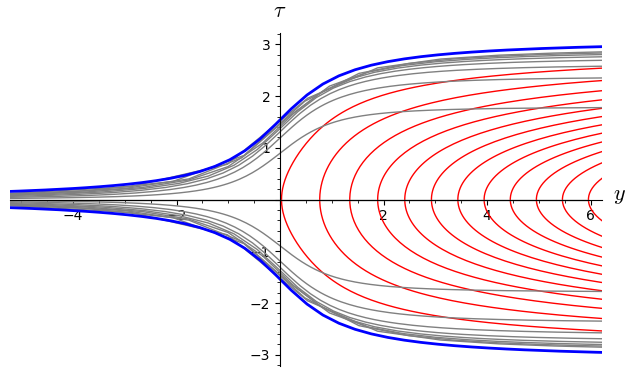

In [84]:
graph = NH.plot(GNH, ambient_coords=(y, ta), fixed_coords={th: pi/2, Ph: 0},
                ranges={T: (-10, 10), R: (0.03, 12)}, color={T: 'red', R: 'grey'}, 
                number_values={T: 17, R: 13}, plot_points=800) + \
        NH.plot(GNH, ambient_coords=(y, ta), fixed_coords={th: pi/2, R: 0.03, Ph: 0},
                ranges={T: (-60, 60)}, color={T: 'blue'}, thickness=2,
                number_values={T: 33}, plot_points=400)
show(graph, xmin=-5, xmax=6)

### Expression of the near horizon metric $h$ in terms of the global NHEK coordinates

In [85]:
h.display(GNH)

h = -(m^2*cos(th)^4 + 2*m^2*cos(th)^2 + (m^2*cos(th)^4 + 6*m^2*cos(th)^2 - 3*m^2)*y^2 + m^2)/(cos(th)^2 + 1) dta⊗dta + 4*m^2*y*sin(th)^2/(cos(th)^2 + 1) dta⊗dps + (m^2*cos(th)^2 + m^2)/(y^2 + 1) dy⊗dy + (m^2*cos(th)^2 + m^2) dth⊗dth + 4*m^2*y*sin(th)^2/(cos(th)^2 + 1) dps⊗dta + 4*m^2*sin(th)^2/(cos(th)^2 + 1) dps⊗dps

In [86]:
h.apply_map(factor, frame=GNH.frame(), chart=GNH, keep_other_components=True)
h.display(GNH)

h = -(y^2*cos(th)^4 + 6*y^2*cos(th)^2 + cos(th)^4 - 3*y^2 + 2*cos(th)^2 + 1)*m^2/(cos(th)^2 + 1) dta⊗dta + 4*m^2*y*sin(th)^2/(cos(th)^2 + 1) dta⊗dps + (cos(th)^2 + 1)*m^2/(y^2 + 1) dy⊗dy + (cos(th)^2 + 1)*m^2 dth⊗dth + 4*m^2*y*sin(th)^2/(cos(th)^2 + 1) dps⊗dta + 4*m^2*sin(th)^2/(cos(th)^2 + 1) dps⊗dps

Let us check that we recover Eq. (2.9) of Bardeen & Horowitz, 
[Phys. Rev. D **60**, 104030 (1999)](https://doi.org/10.1103/PhysRevD.60.104030). This is actually obvious for all the terms, except for $h_{\tau\tau}$. For the latter, the computation

In [87]:
h00 = h[GNH.frame(),0,0,GNH].expr()
(h00 + m^2*(1 + cos(th)^2)*(1 + y^2)).simplify_full()

4*m^2*y^2*sin(th)^2/(cos(th)^2 + 1)

shows that
$$ h_{\tau\tau} = m^2 \left[ - (1 + \cos^2\theta)(1 + y^2) + 4 \frac{y^2\sin^2\theta}{1 + \cos^2\theta} \right], $$
which yields a full agreement with Eq. (2.9) of Bardeen & Horowitz, up to an overall factor $2 m^2$.

### Expression of the $h$-Killing vector $\frac{\partial}{\partial\tau}$ in terms of $\xi_1$ and $\xi_3$

In [88]:
GNH.frame()[0].display(NH)

∂/∂ta = 1/2*(R^2*T^2 + R^2 + 1)/R^2 ∂/∂T - R*T ∂/∂R - 1/R ∂/∂Ph

In [89]:
GNH.frame()[0] == xi3 + xi1/2

True

Hence we have:
$$ \frac{\partial}{\partial\tau} = \xi_3 + \frac{1}{2} \xi_1$$.